# **Puente Browniano (Brownian Bridge)**

**Definición:**

Un procesos estocástico $\{X(t)= B(t) - \frac{t}{T} B(T) , 0 \leq t \leq T \}$,  es un puente Browniano si satisface las siguientes propiedades:

1.- $X(0)=X(T)=0$

2.- $X(t)$ se distribuye como una normal con media cero y varianza $t(1-t/T)$
\begin{equation*}
E(X(t)) = 0
\end{equation*}  
y 
\begin{equation*}
Var(X(t)) = t(1-t/T)
\end{equation*}

3.- $Cov(X(s), X(t)) = min(s, t) - \frac{st}{T}$


## **Simulación:**

In [4]:
library('dplyr')
library('tidyr')
library('ggplot2')

In [5]:
# Función para generar trajectorias del Puente Browniano (PB)
simPB <- function(t, nSteps, nReps){
  dt <- t/ nSteps
  # Simulación de un Movimiento Browniano
  BM <- matrix(nrow=nReps, ncol=(nSteps+1))
  BM[ ,1] <- 0
  for(i in 1:nReps){
    for(j in 2:(nSteps + 1)){
      BM[i,j] <- BM[i,j-1] + sqrt(dt)*rnorm(1,0,1)
    }
  }
  # Simulación del puente Browniano
  BB <- matrix(nrow=nReps, ncol=(nSteps+1))
  BB[ ,1] <- 0
  for(i in 1:nReps){
    for(j in 2:(nSteps + 1)){
      BB[i,j] <- BM[i,j]-(j/nSteps)*BM[i,nSteps+1]
    }
  }
  # Data frame
  names <- c('Rep', sapply(0:nSteps, function(i) paste('S',i,sep='')))
  df <- data.frame('Rep'=1:nReps, BB)
  colnames(df) <- names

  return(df)
}

## **Ejemplo 1:**

In [6]:
# Ejemplo 1
t <- 1
nSteps <- 1000
nReps <- 2

pb1 <- simPB(t, nSteps, nReps)
#print(gbm1)

In [8]:
df <- pb1 %>% 
  pivot_longer(!Rep, names_to='Step', values_to='value') %>%
  mutate(t = as.numeric(substring(Step,2,10))*t/nSteps,
         Rep = as.character(Rep))
head(df)

# Media y varianza teóricas
moments <- data.frame('t'=seq(from=0, to=1, length=nSteps+1)*t) %>%
  mutate('mean' = 0,
          'sd_inf' = mean - 2*sqrt(t),
          'sd_sup' = mean + 2*sqrt(t)) 

Rep,Step,value,t
<chr>,<chr>,<dbl>,<dbl>
1,S0,0.00000000,0.000
1,S1,-0.04429152,0.001
1,S2,-0.06348417,0.002
1,S3,-0.01833466,0.003
1,S4,-0.03746753,0.004
1,S5,-0.06824662,0.005


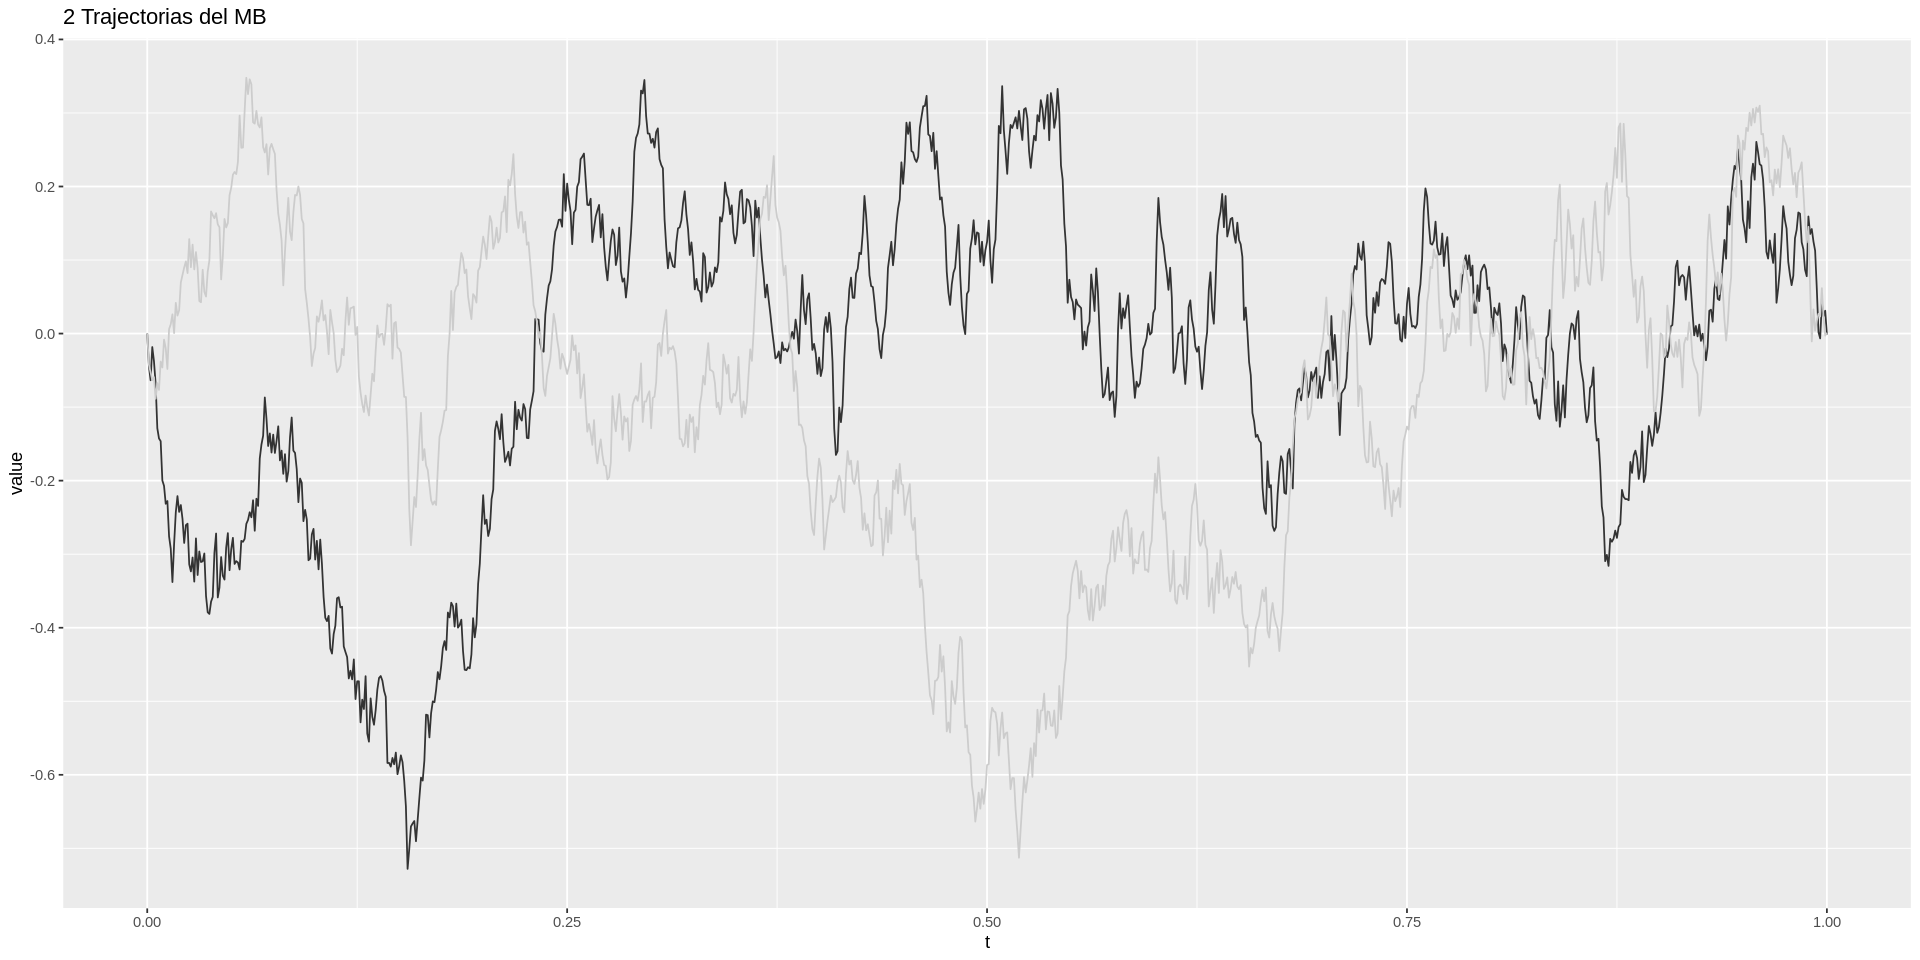

In [9]:
# Gráfico del Movimiento Browniano
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(df, mapping=aes(x=t, y=value, color=Rep)) + 
  geom_line() + 
  #geom_step(moments, mapping=aes(x=t,y=mean),col='red',size=0.7, alpha=0.5) +
  #geom_step(moments, mapping=aes(x=t,y=sd_sup),col='blue',size=0.7,linetype = "dashed") +
  #geom_step(moments, mapping=aes(x=t,y=sd_inf),col='blue',size=0.7,linetype = "dashed") +
  labs( title = paste(nReps, "Trajectorias del MB")) +
  theme(legend.position = "none") +
  scale_colour_grey(start = 0.2,end = 0.8) 
  #coord_cartesian(xlim = c(0, tmax))
p1

## **Ejemplo 2:**

In [10]:
# Ejemplo 2
t <- 1
nSteps <- 1000
nReps <- 500

pb1 <- simPB(t, nSteps, nReps)
#print(gbm1)

In [39]:
df <- pb1 %>% 
  pivot_longer(!Rep, names_to='Step', values_to='value') %>%
  mutate(t = as.numeric(substring(Step,2,10))*t/nSteps,
         Rep = as.character(Rep))
head(df)

# Media y varianza teóricas
moments <- data.frame('t'=seq(from=0, to=1, length=nSteps)*t) %>%
  mutate('mean' = 0,
          'sd_inf' = mean - 2*sqrt(t),
          'sd_sup' = mean + 2*sqrt(t)) 

Rep,Step,value,t
<chr>,<chr>,<dbl>,<dbl>
1,S0,0.000000000,0e+00
1,S1,-0.005995414,1e-04
1,S2,-0.021869386,2e-04
1,S3,-0.007300084,3e-04
1,S4,-0.022459281,4e-04
1,S5,0.023176880,5e-04


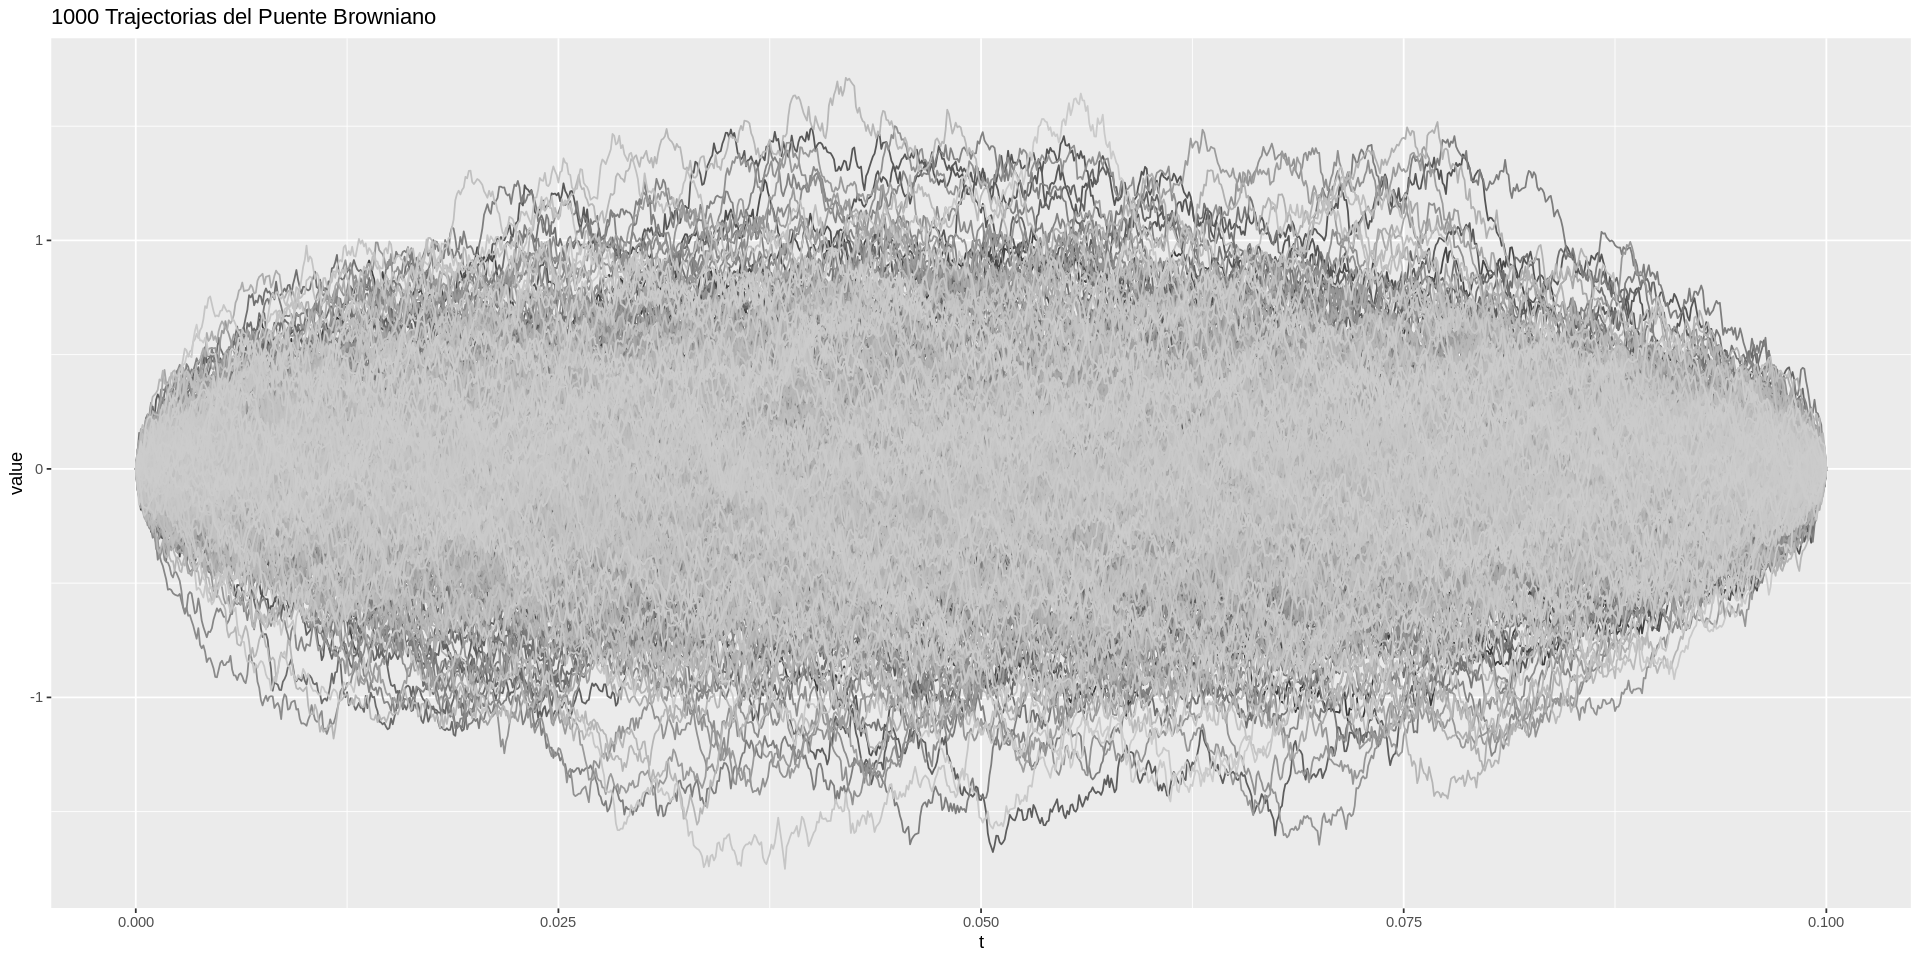

In [40]:
# Gráfico del Movimiento Browniano
options(repr.plot.width=16, repr.plot.height=8)
p2 <- ggplot(df, mapping=aes(x=t, y=value, color=Rep)) + 
  geom_line() + 
  #geom_step(moments, mapping=aes(x=t,y=mean),col='red',size=0.7, alpha=0.5) +
  #geom_step(moments, mapping=aes(x=t,y=sd_sup),col='blue',size=0.7,linetype = "dashed") +
  #geom_step(moments, mapping=aes(x=t,y=sd_inf),col='blue',size=0.7,linetype = "dashed") +
  labs( title = paste(nReps, "Trajectorias del Puente Browniano")) +
  theme(legend.position = "none") +
  scale_colour_grey(start = 0.2,end = 0.8) 
  #coord_cartesian(xlim = c(0, tmax))
p2

## **Puente Browniano en dos dimensiones**

In [50]:
#  Movimiento Browniano en dos dimensiones
plot.PB2d <- function(base, n.steps){
  
  df <- base
  df_2d <- df  %>%
    gather(key='t',value='valor',-Rep) %>%
    filter(Rep == 1 | Rep== 2) %>%
    spread(Rep, valor)  %>%
    rename(Rep1 = '1', Rep2='2')%>%
    mutate(t = as.numeric(substring(t,2,10))) %>%
    arrange(t) %>%
    filter(t <= n.steps)
  b2 <- ggplot(df_2d,aes(x=Rep1,y=Rep2))+
    geom_point(color="blue") +
    geom_point(df_2d%>%filter(t == 0),mapping=aes(x=Rep1,y=Rep2), size=4, color="green") +
    geom_point(df_2d%>%filter(t == max(t)),mapping=aes(x=Rep1,y=Rep2), size=3, color="red") +
    geom_path() +
    theme(axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks.x=element_blank(),
          axis.ticks.y=element_blank()
          )
  return(b2)
}

**Ejemplo 1:**

In [51]:
# Ejemplo 1:
t <- 1
nSteps <- 10000
nReps <- 1000

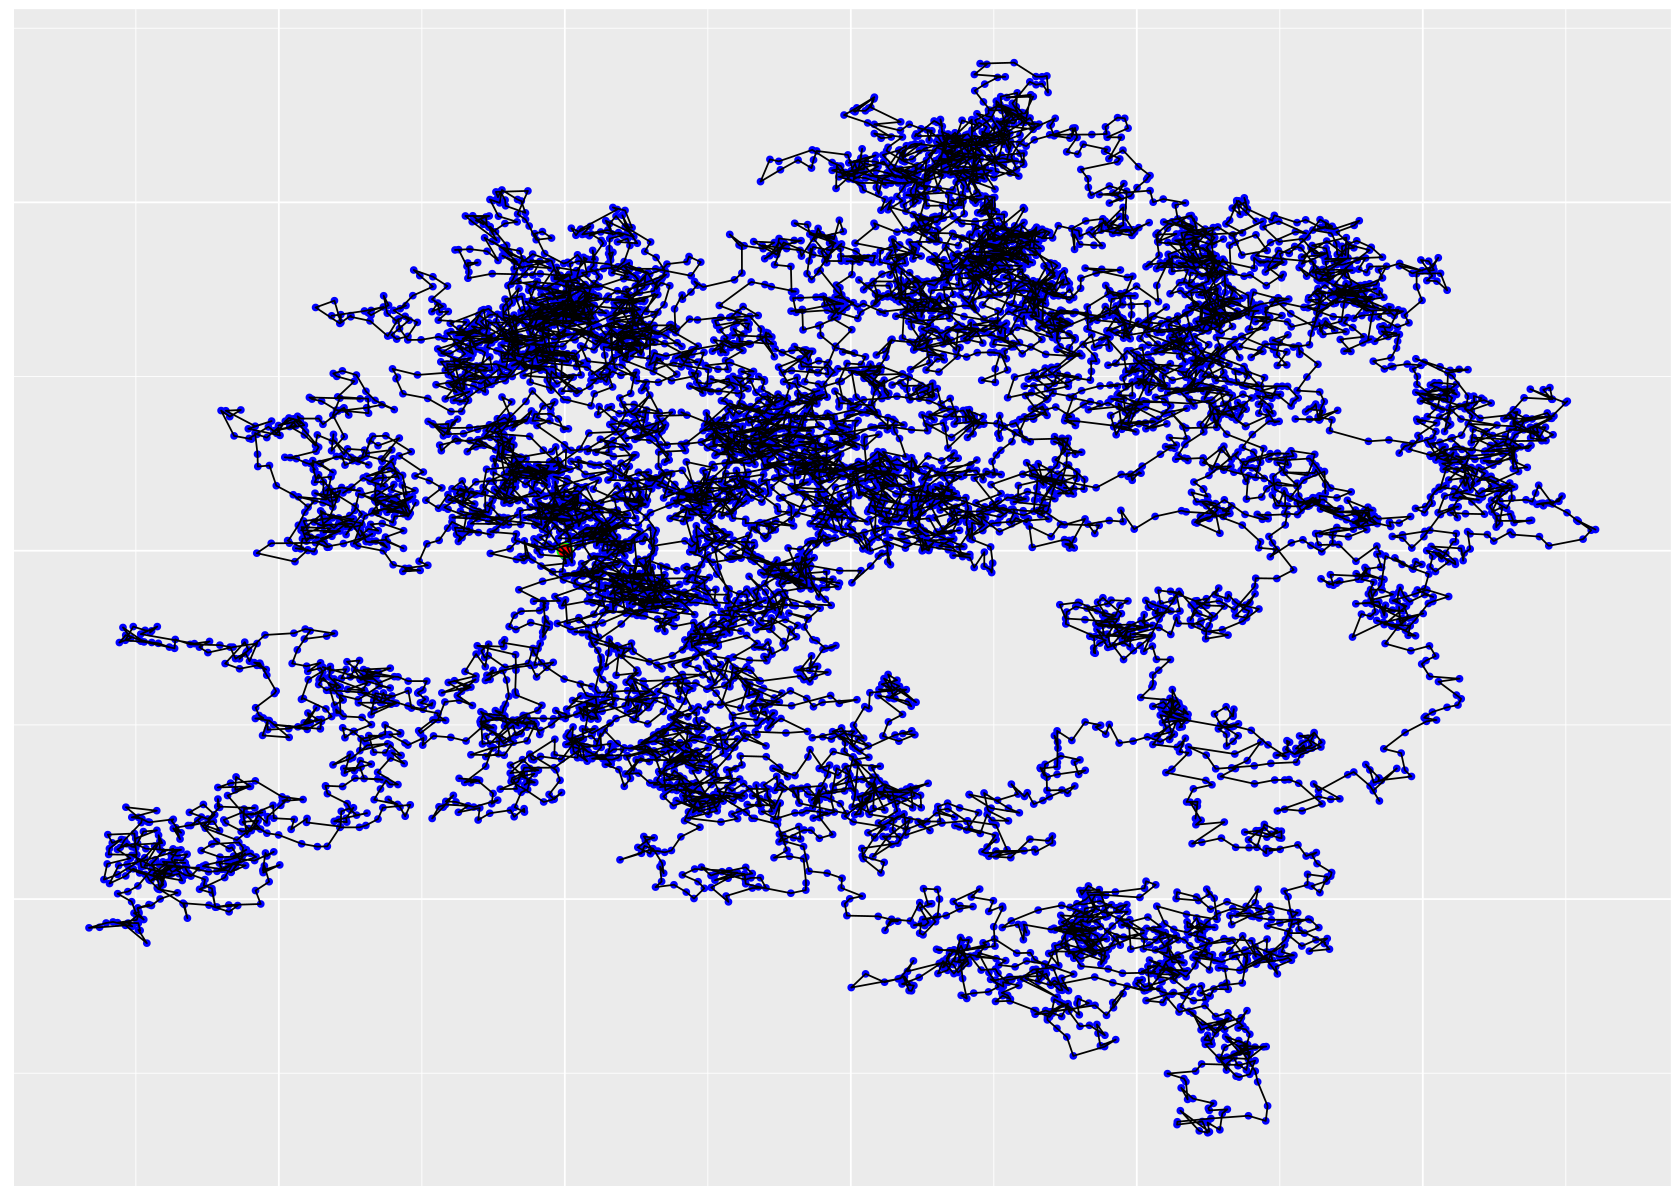

In [52]:
# Plot
options(repr.plot.width=14, repr.plot.height=10)
df <- simPB(t, nSteps, nReps)
p3 <- plot.PB2d(df, nSteps)
p3 